# 1. Environment Setup & Data Acquisition

In [279]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [280]:
#  Get the dataset 
retail_datapath = r"/Users/rosepeterfunja/Tanzania_KIC/Assignment/unsupervised-machine-learning-rhysrose/data/retail_customer_data.csv"
trans_datapath = r"/Users/rosepeterfunja/Tanzania_KIC/Assignment/unsupervised-machine-learning-rhysrose/data/customer_transactions.csv"
df1 = pd.read_csv(retail_datapath)
df1.head()
df1.info()
df1.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   object 
 1   age                       1000 non-null   int64  
 2   gender                    1000 non-null   object 
 3   annual_income             1000 non-null   int64  
 4   education                 1000 non-null   object 
 5   marital_status            1000 non-null   object 
 6   city                      1000 non-null   object 
 7   state                     1000 non-null   object 
 8   country                   1000 non-null   object 
 9   postal_code               1000 non-null   int64  
 10  signup_date               1000 non-null   object 
 11  purchase_frequency        1000 non-null   int64  
 12  avg_purchase_value        1000 non-null   float64
 13  total_spent               1000 non-null   float64
 14  days_sinc

,age,annual_income,postal_code,purchase_frequency,avg_purchase_value,total_spent,days_since_last_purchase,electronics_score,clothing_score,home_decor_score,...,food_score,website_visits_per_month,avg_session_duration,mobile_app_usage,desktop_usage,items_viewed_per_visit,cart_abandonment_rate,email_engagement_rate,support_tickets,satisfaction_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,46.849000,67893.698000,50302.844000,8.145000,38.011950,319.83385,60.319000,48.955000,49.609000,49.403000,...,48.828000,4.797000,14.46913,51.373000,48.249000,9.282000,50.372000,38.084000,1.18000,6.719200
std,16.583221,35964.928189,28762.821338,3.611512,23.527329,265.35732,35.105978,20.888689,20.817817,21.334896,...,20.818641,2.655342,6.83541,28.838751,28.890061,5.521681,16.196108,22.718254,1.16058,1.126419
min,18.000000,13230.000000,536.000000,0.000000,15.000000,0.00000,1.000000,0.000000,4.000000,1.000000,...,1.000000,0.000000,-6.05000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,3.900000
25%,33.000000,42394.750000,26266.000000,5.000000,15.000000,120.00000,29.000000,33.000000,34.000000,34.000000,...,34.750000,3.000000,9.80750,27.000000,23.000000,5.000000,39.000000,21.000000,0.00000,6.000000
50%,47.000000,60912.000000,50732.000000,8.000000,33.200000,234.16000,59.000000,49.000000,49.000000,49.000000,...,48.000000,5.000000,14.28000,51.000000,48.000000,9.000000,51.000000,39.000000,1.00000,6.800000
75%,61.000000,84901.000000,75573.000000,11.000000,53.180000,427.58250,92.000000,64.000000,65.000000,65.000000,...,64.000000,6.000000,18.84750,75.000000,73.000000,13.000000,61.000000,54.000000,2.00000,7.600000
max,75.000000,289534.000000,99837.000000,21.000000,153.860000,1611.42000,120.000000,99.000000,100.000000,100.000000,...,99.000000,13.000000,37.82000,100.000000,100.000000,28.000000,100.000000,100.000000,9.00000,9.100000


In [281]:
df2 = pd.read_csv(trans_datapath)
df2.head()
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      10000 non-null  object 
 1   customer_id         10000 non-null  object 
 2   transaction_date    10000 non-null  object 
 3   transaction_amount  10000 non-null  float64
 4   item_category       10000 non-null  object 
 5   item_count          10000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


,transaction_amount,item_count
count,10000.000000,10000.000000
mean,37.948390,2.130700
std,27.789876,1.251868
min,5.000000,1.000000
25%,16.940000,1.000000
50%,29.525000,2.000000
75%,51.742500,3.000000
max,223.970000,9.000000


# 2. Data Preprocessing

- No missing values were found — great for modeling!

- Merged the two files on customer_id

- Income ranges from $13230  To  $289534 with a mean of ~$67,894.

- Age spans from 18 to 75, averaging around 47.

- Satisfaction scores average 6.72 on a 10 -point scale, ranging from 3.9 to 9.1.

- Some possible data issues: avg_session_duration has a negative value (-6.05) — we’ll flag that for preprocessing.

In [283]:
# Merge on a common column customer_id
merged_df = pd.merge(df1, df2, on='customer_id', how='inner')  
merged_df.to_csv('merged.csv', index=False)

In [284]:
datapath = r"/Users/rosepeterfunja/Tanzania_KIC/Assignment/unsupervised-machine-learning-rhysrose/merged.csv"
df = pd.read_csv(datapath)

In [285]:
categorical_df = df.select_dtypes(include=['object', 'category'])
print(categorical_df.head())

  customer_id gender    education marital_status        city state country  \
0    7e58732d   Male  High School       Divorced  Curtisfurt    CT      US   
1    7e58732d   Male  High School       Divorced  Curtisfurt    CT      US   
2    7e58732d   Male  High School       Divorced  Curtisfurt    CT      US   
3    7e58732d   Male  High School       Divorced  Curtisfurt    CT      US   
4    7e58732d   Male  High School       Divorced  Curtisfurt    CT      US   

  signup_date favorite_payment_method transaction_id transaction_date  \
0  2023-11-26              Debit Card        T001210       2024-04-12   
1  2023-11-26              Debit Card        T001298       2024-01-09   
2  2023-11-26              Debit Card        T003029       2025-02-02   
3  2023-11-26              Debit Card        T003128       2024-03-07   
4  2023-11-26              Debit Card        T003660       2024-11-08   

  item_category  
0        Beauty  
1   Electronics  
2          Food  
3      Clothing  
4 

In [286]:
df.describe()

,age,annual_income,postal_code,purchase_frequency,avg_purchase_value,total_spent,days_since_last_purchase,electronics_score,clothing_score,home_decor_score,...,avg_session_duration,mobile_app_usage,desktop_usage,items_viewed_per_visit,cart_abandonment_rate,email_engagement_rate,support_tickets,satisfaction_score,transaction_amount,item_count
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,46.681600,67596.047800,49998.66270,8.125500,38.12255,321.541477,60.380200,48.636700,49.395100,49.293000,...,14.471909,51.234600,48.380800,9.285100,50.078300,37.893300,1.195200,6.709000,37.948390,2.130700
std,16.737313,35834.268132,28623.46453,3.632832,23.47999,268.933161,34.906654,20.685785,20.840236,21.179325,...,6.857336,28.894599,28.902902,5.545547,16.322586,22.631348,1.173982,1.133725,27.789876,1.251868
min,18.000000,13230.000000,536.00000,0.000000,15.00000,0.000000,1.000000,0.000000,4.000000,1.000000,...,-6.050000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.900000,5.000000,1.000000
25%,32.000000,42116.000000,25882.00000,5.000000,15.00000,120.000000,30.000000,33.000000,34.000000,34.000000,...,9.700000,26.000000,23.000000,5.000000,38.000000,21.000000,0.000000,6.000000,16.940000,1.000000
50%,47.000000,60437.000000,50166.00000,8.000000,33.29000,234.435000,59.000000,49.000000,49.000000,48.000000,...,14.270000,51.000000,48.000000,9.000000,50.000000,38.000000,1.000000,6.700000,29.525000,2.000000
75%,61.000000,85621.000000,75000.00000,11.000000,53.40000,429.010000,92.000000,64.000000,65.000000,65.000000,...,18.970000,75.000000,73.000000,13.000000,61.000000,53.000000,2.000000,7.600000,51.742500,3.000000
max,75.000000,289534.000000,99837.00000,21.000000,153.86000,1611.420000,120.000000,99.000000,100.000000,100.000000,...,37.820000,100.000000,100.000000,28.000000,100.000000,100.000000,9.000000,9.100000,223.970000,9.000000


In [287]:
# Handling negative values

median_session_duration = df['avg_session_duration'][df['avg_session_duration'] >= 0].median()

df['avg_session_duration'] = df['avg_session_duration'].apply(
    lambda x: median_session_duration if x < 0 else x
)

categorical_cols = ['gender', 'education', 'marital_status', 'city', 'state','country', 'favorite_payment_method']
# Label encoding
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Feature scaling
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_features])

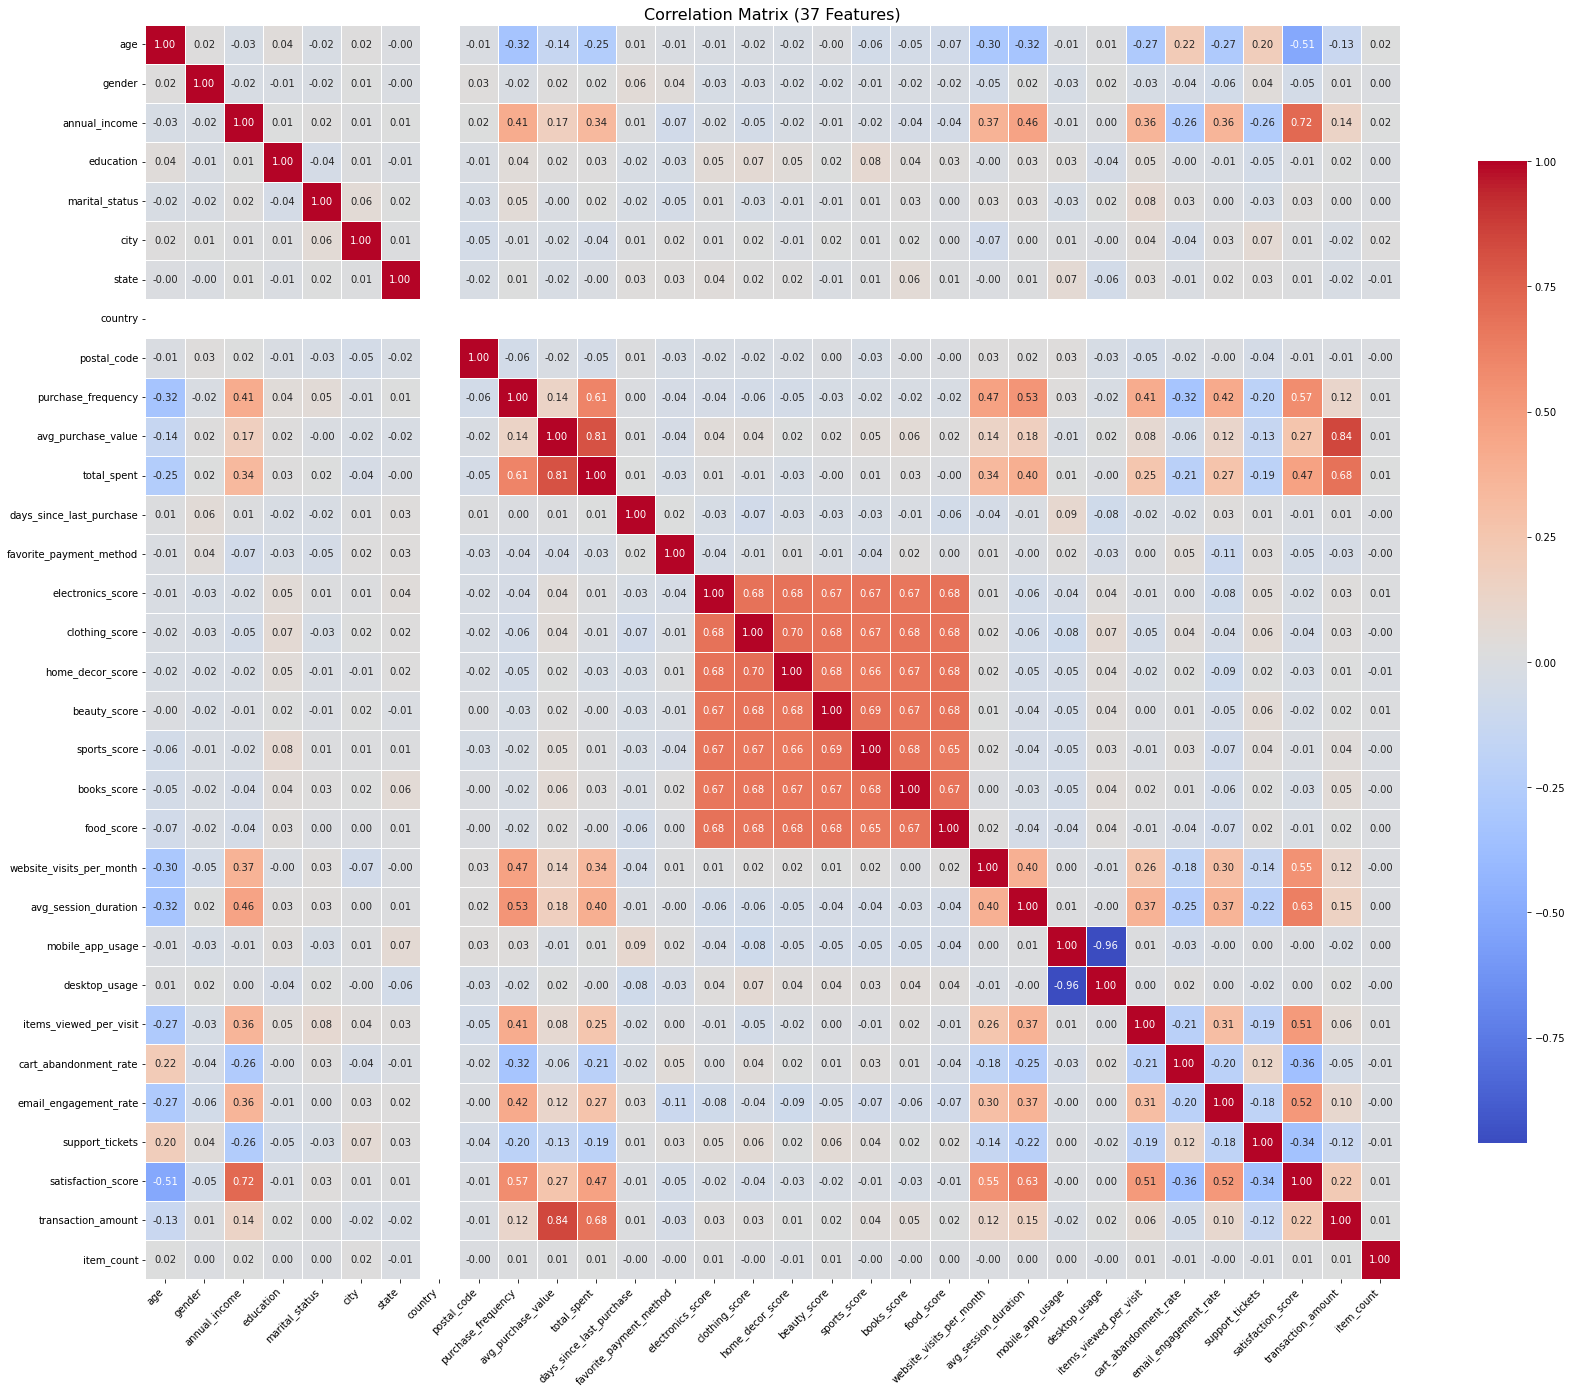

In [288]:

# Compute correlation matrix
corr_matrix = df.corr()

# Set bigger figure size based on number of variables
plt.figure(figsize=(24, 20))  # Adjust as needed for your screen

# Create the heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.75})  # Optional: shrinks color bar

# Title and layout
plt.title('Correlation Matrix (37 Features)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Step 3 - Dimensionality Reduction

PCA retained 2 components
Cumulative explained variance: [0.61073889 0.99992884]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


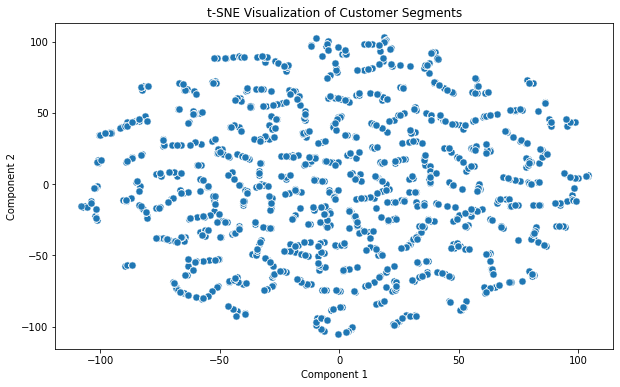

In [290]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# PCA for dimensionality reduction (retain 95% variance)
pca = PCA(n_components=0.95)
pca_result = pca.fit_transform(df[numeric_features])
print(f"PCA retained {pca.n_components_} components")
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(df[numeric_features])

# Plot t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], s=50, alpha=0.7)
plt.title("t-SNE Visualization of Customer Segments")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 4 Clustering Algorithms Implementation

## **4.1 K-Means clustering**

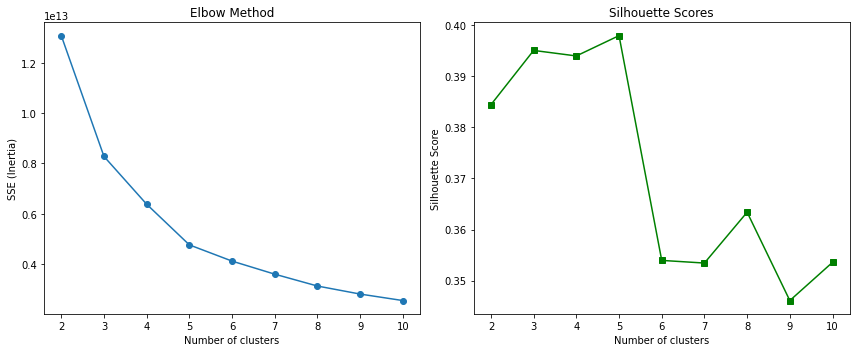

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Elbow method to find optimal k
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)  # using PCA-reduced data
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_result, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


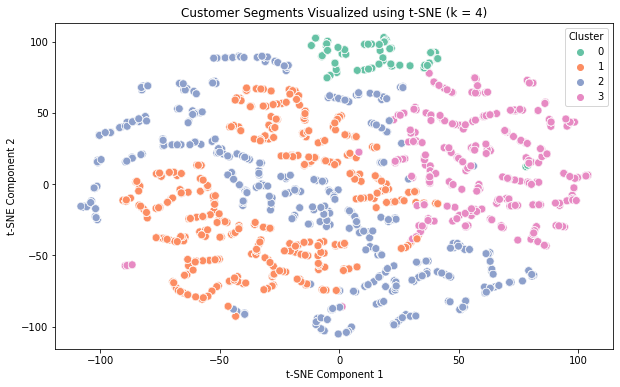

In [294]:
# Final K-Means model with optimal k 
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(pca_result)

# Add cluster labels to your DataFrame (optional)
df['cluster'] = cluster_labels

# Visualize clusters in 2D using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=cluster_labels,
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title(f'Customer Segments Visualized using t-SNE (k = {optimal_k})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


In [295]:
# Evaluate  K-Means clustering 
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(pca_result, df['cluster'])

print(f"Silhouette Score (K-Means, k=4): {score_kmeans:.4f}")

Silhouette Score (K-Means, k=4): 0.3940


In [296]:
cluster_profiles = df.groupby('cluster')[numeric_features].mean().round(2)
cluster_profiles['Customer Count'] = df['cluster'].value_counts().sort_index()
cluster_profiles.reset_index(inplace=True)
cluster_profiles.rename(columns={'cluster': 'Cluster'}, inplace=True)
print(cluster_profiles)

   Cluster    age  gender  annual_income  education  marital_status    city  \
0        0  45.46    1.06      165622.41       1.92            1.53  509.17   
1        1  46.74    1.03       46448.22       2.01            1.46  469.45   
2        2  47.11    1.00       53023.09       2.03            1.55  505.88   
3        3  46.26    1.05       95722.05       2.08            1.59  460.98   

   state  country  postal_code  ...  mobile_app_usage  desktop_usage  \
0  31.48      0.0     51729.56  ...             50.69          49.04   
1  28.17      0.0     74931.06  ...             50.71          48.93   
2  29.15      0.0     22372.92  ...             51.06          48.69   
3  28.84      0.0     55732.12  ...             52.35          46.99   

   items_viewed_per_visit  cart_abandonment_rate  email_engagement_rate  \
0                   12.22                  41.40                  52.78   
1                    7.86                  52.41                  32.45   
2                 


# Customer Cluster Profiles Interpretation 

## Cluster Summary Table

| Cluster | Income        | Satisfaction | App Usage       | Cart Abandonment | Email Engagement | Strategic Focus           |
|---------|---------------|--------------|------------------|------------------|------------------|---------------------------|
| **0**   | Very High (~165K) | **Very High (8.15)** | Balanced          | **Low (41.4%)**  | **High (52.78%)** | VIP treatment, loyalty & exclusives |
| **1**   | Low (~46K)    | **Lowest (6.13)**   | Balanced          | **High (52.4%)** | **Low (32.45%)** | Discounts, support improvement |
| **2**   | Mid (~53K)    | Low-Mid (6.36) | Balanced          | **High (52.5%)** | Low (33.71%)     | Conversion & personalization |
| **3**   | High (~95K)   | **High (7.70)**   | Slightly Higher   | Medium (45.3%)   | Medium (48.22%)  | Upsell, smart engagement |

---

##  Cluster Interpretations & Strategy

###  **Cluster 0: Affluent & Satisfied Customers**
- **Behavior**: High income, high satisfaction, high engagement, low cart abandonment.
- **Insight**: These are the VIPs.
- **Action**:
  - Offer premium services or tiers
  - Loyalty rewards, early access to products
  - Keep them feeling valued

---

###  **Cluster 1: Value-Conscious Low Spenders**
- **Behavior**: Lowest income and satisfaction, highest support needs.
- **Insight**: They’re cost-sensitive and service-frustrated.
- **Action**:
  - Offer simple self-service support
  - Promote discounts and bundles
  - Improve onboarding and customer experience

---

### **Cluster 2: Average Spenders, Still Uncertain**
- **Behavior**: Middle-income, low engagement, high cart abandonment.
- **Insight**: Opportunity to turn them into loyal customers.
- **Action**:
  - Use retargeting and personalized product suggestions
  - Provide incentives to complete purchases
  - Encourage feedback to understand barriers

---

###  **Cluster 3: High-Income, Underutilized**
- **Behavior**: High satisfaction, decent income, under-engaged.
- **Insight**: Could spend more if nurtured.
- **Action**:
  - Encourage cross-sells and add-ons
  - Personalize journeys using browsing data
  - Introduce achievement-based loyalty tiers


## **4.2 Hierarchical clustering**

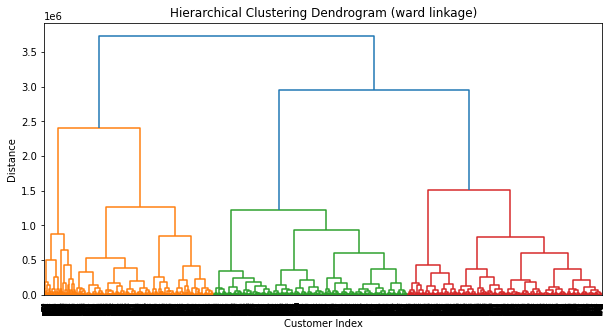

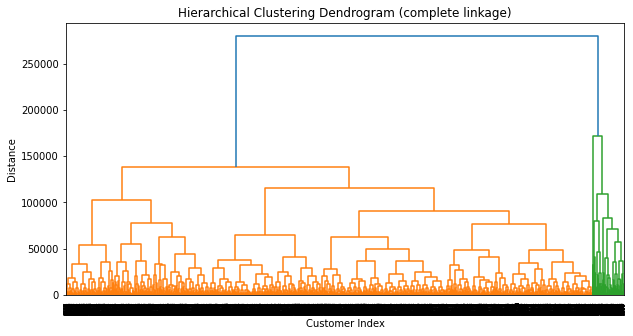

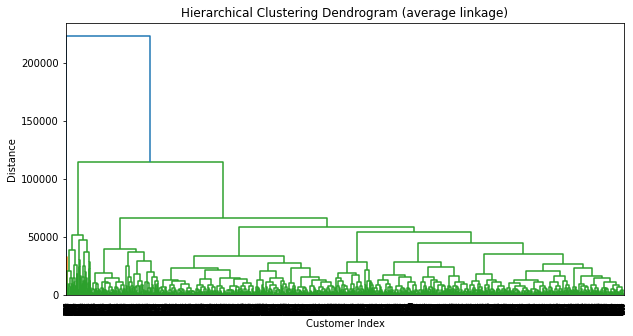

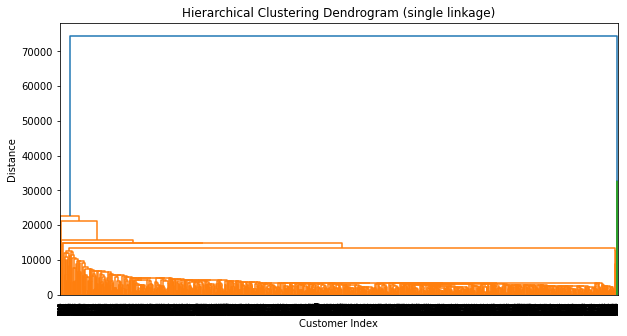

In [299]:
#Dendrograms with Different Linkages

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Using PCA result for plotting (less noisy with PCA)
data_for_clustering = pca_result 

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    dendrogram = sch.dendrogram(sch.linkage(data_for_clustering, method=method))
    plt.xlabel('Customer Index')
    plt.ylabel('Distance')
    plt.show()


In [300]:
#Form Clusters from Dendrogram

from scipy.cluster.hierarchy import fcluster

# Create clusters using Ward method and cut at 4 clusters
linked = sch.linkage(data_for_clustering, method='ward')
hierarchical_labels = fcluster(linked, t=4, criterion='maxclust')

# Add to dataset
df['hierarchical_cluster'] = hierarchical_labels


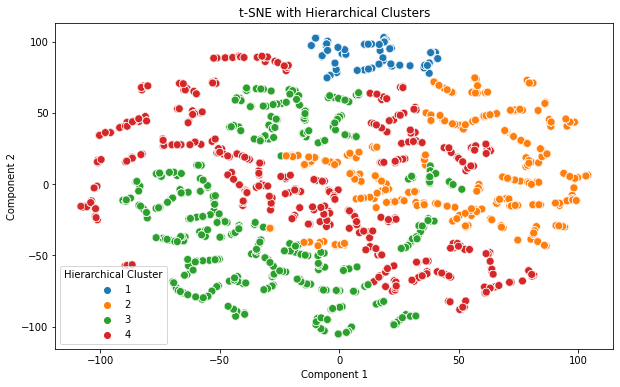

In [301]:
#Compare with K-Means Clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                hue=df['hierarchical_cluster'],
                palette='tab10', s=60, alpha=0.8)
plt.title('t-SNE with Hierarchical Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Hierarchical Cluster')
plt.show()


In [302]:
#Evaluate Hierarchical Clustering Quality
from sklearn.metrics import silhouette_score

# Evaluate hierarchical clustering (using Ward linkage and 4 clusters)
score_hierarchical = silhouette_score(data_for_clustering, hierarchical_labels)
print(f"Silhouette Score (Hierarchical, k=4): {score_hierarchical:.4f}")


Silhouette Score (Hierarchical, k=4): 0.3557


# Insights:
- K-Means performed better than hierarchical in this case, with more well-defined and separated clusters.

- A score of ~0.39 suggests moderate structure, meaning some customer groups are distinct but with a bit of overlap — not unusual in behavioral datasets.

In [304]:
# Hierarchical Cluster Profiling (like K-Means)

# Profile each hierarchical cluster by computing the mean of numeric features
hierarchical_profiles = df.groupby('hierarchical_cluster')[numeric_features].mean().round(2)

# Add number of customers in each cluster
hierarchical_profiles['Customer Count'] = df['hierarchical_cluster'].value_counts().sort_index()

# Reset index and rename for clarity
hierarchical_profiles.reset_index(inplace=True)
hierarchical_profiles.rename(columns={'hierarchical_cluster': 'Cluster'}, inplace=True)

# Show profile
print(hierarchical_profiles)


   Cluster    age  gender  annual_income  education  marital_status    city  \
0        1  45.56    1.07      165885.03       1.87            1.49  492.91   
1        2  46.59    1.01       89416.04       2.06            1.49  469.81   
2        3  46.01    1.07       43271.05       2.01            1.51  460.61   
3        4  47.60    0.99       60363.65       2.04            1.58  512.55   

   state  country  postal_code  ...  mobile_app_usage  desktop_usage  \
0  31.51      0.0     50402.77  ...             51.92          48.23   
1  28.12      0.0     70976.46  ...             53.07          46.40   
2  28.76      0.0     66087.18  ...             49.43          49.89   
3  29.10      0.0     18958.59  ...             51.61          48.31   

   items_viewed_per_visit  cart_abandonment_rate  email_engagement_rate  \
0                   11.73                  41.25                  52.83   
1                   11.07                  46.62                  45.88   
2                 


#  Hierarchical Clustering: Customer Profile Report

## Cluster Summary Table

| Cluster | Income         | Satisfaction | App Usage | Cart Abandonment | Email Engagement | Support Tickets | Strategic Focus                  |
|---------|----------------|--------------|-----------|------------------|------------------|------------------|----------------------------------|
| **1**   | **Very High (~166K)** | **Very High (8.15)** | High (~52)  | **Lowest (41.25%)** | **Highest (52.83%)** | Lowest (0.56)  | VIP loyalty, personalized services |
| **2**   | **High (~89K)**       | **High (7.50)**      | Highest (~53) | Mid (46.62%)       | High (45.88%)     | Mid (0.87)      | Target for cross-sell, premium upsell |
| **3**   | **Low (~43K)**        | **Lowest (6.05)**    | Low (~49)   | **High (52.17%)**   | **Lowest (31.50%)**| Highest (1.48)   | Budget-focused retention strategy |
| **4**   | **Mid (~60K)**        | Low-Mid (6.57)       | High (~52)  | High (51.88%)       | Low-Mid (36.16%)  | High (1.25)      | Improve engagement & cart recovery |

---

## Cluster Interpretations & Actions

###  **Cluster 1: Affluent Engaged Loyalists**
-  **Highest income** (~166K)  
-  **Very satisfied** (8.15)  
-  Low cart abandonment, strong digital activity  
-  High email responsiveness  
-  **Strategy**:
  - Exclusive VIP programs  
  - Personalized service and early-access promotions  
  - Celebrate loyalty with rewards or status levels

---

###  **Cluster 2: High-Income Upsell Potential**
-  **Well-off customers** (~89K)  
-  High satisfaction  
-  Highest app usage  
-  Responsive to email, low complaints  
-  **Strategy**:
  - Push **value-added** or **bundle deals**  
  - Introduce **tiered premium services**  
  - Promote high-margin products

---

###  **Cluster 3: At-Risk Value Seekers**
-  **Lowest income** (~43K)  
-  **Least satisfied** (6.05)  
-  High cart abandonment  
-  Highest support tickets, low digital engagement  
-  **Strategy**:
  - Provide stronger support and onboarding  
  - Run **win-back campaigns** and **limited-time offers**  
  - Simplify digital interfaces for ease-of-use

---

###  **Cluster 4: Mid-Income Fence Sitters**
-  **Moderate income** (~60K)  
-  Average satisfaction (6.57)  
-  High cart abandonment  
-  Low-to-moderate engagement  
-  **Strategy**:
  - Use A/B testing to improve conversion  
  - Offer discounts on abandoned carts  
  - Trigger re-engagement via email nudges or personalized ads


## 4.3 DBSCAN

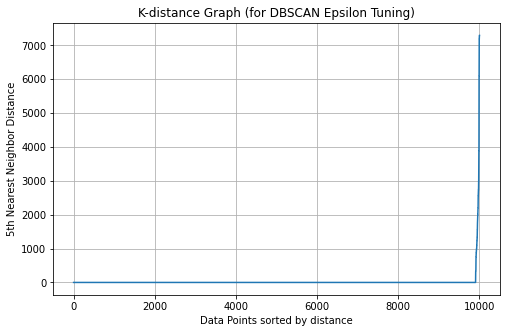

In [307]:
#DBSCAN Setup and Tuning
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Use PCA-reduced or scaled full data
X = pca_result  # or retail_scaled

# Step 1.1: Find optimal epsilon using k-distance plot
k = 5  # typically min_samples
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = nearest_neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances to plot elbow
distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-distance Graph (for DBSCAN Epsilon Tuning)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


In [308]:
# Apply DBSCAN with selected eps and min_samples
dbscan = DBSCAN(eps=1.5, min_samples=5)  # tune eps based on your plot
dbscan_labels = dbscan.fit_predict(X)

# Attach labels to dataset
df['dbscan_cluster'] = dbscan_labels


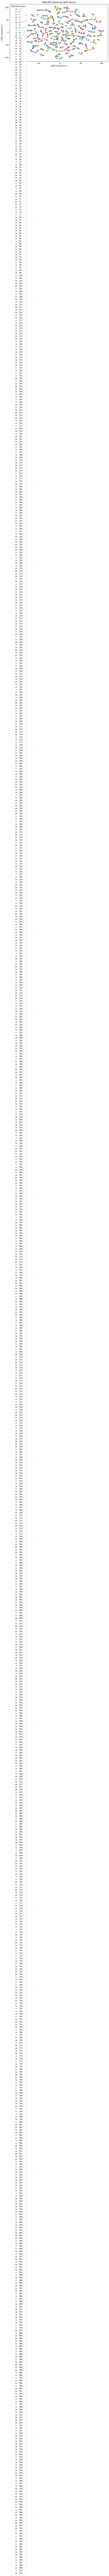

In [309]:
#Visualize Clusters & Noise
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                hue=df['dbscan_cluster'],
                palette='tab10', s=60, alpha=0.8)
plt.title('DBSCAN Clustering (with Noise)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='DBSCAN Cluster')
plt.show()


In [310]:
# Number of clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters} clusters and identified {n_noise} noise points.")


DBSCAN found 972 clusters and identified 95 noise points.


In [311]:
#Test Higher eps Values
from sklearn.metrics import silhouette_score

for eps_val in [2.0, 3.0, 4.0, 5.0]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        score = silhouette_score(pca_result, labels)
    else:
        score = None

    print(f"eps={eps_val} → Clusters: {n_clusters}, Noise: {n_noise}, Silhouette: {score}")


eps=2.0 → Clusters: 972, Noise: 95, Silhouette: 0.9813607837238533
eps=3.0 → Clusters: 972, Noise: 95, Silhouette: 0.9813607837238533
eps=4.0 → Clusters: 972, Noise: 95, Silhouette: 0.9813607837238533
eps=5.0 → Clusters: 972, Noise: 95, Silhouette: 0.9813607837238533


# 4.3 Gaussian Mixture Models


In [313]:
from sklearn.mixture import GaussianMixture


# Use PCA-reduced or scaled full data (here we use PCA)
X = pca_result

# Fit GMM with 4 components
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)

# Predict clusters (hard labels) and probabilities (soft assignments)
gmm_labels = gmm.predict(X)
gmm_probs = gmm.predict_proba(X)  # matrix: rows = customers, cols = cluster probabilities

# Add to dataset
df['gmm_cluster'] = gmm_labels


In [314]:
# Silhouette score
score_gmm = silhouette_score(X, gmm_labels)
print(f"Silhouette Score (GMM, k=4): {score_gmm:.4f}")


Silhouette Score (GMM, k=4): 0.3852


In [315]:
# View probability distribution for the first 5 customers
probs_df = pd.DataFrame(gmm_probs, columns=[f'prob_cluster_{i}' for i in range(gmm.n_components)])
probs_df.head()


,prob_cluster_0,prob_cluster_1,prob_cluster_2,prob_cluster_3
0,0.059479,0.03234,0.275682,0.632499
1,0.059479,0.03234,0.275682,0.632499
2,0.059479,0.03234,0.275682,0.632499
3,0.059479,0.03234,0.275682,0.632499
4,0.059479,0.03234,0.275681,0.632499


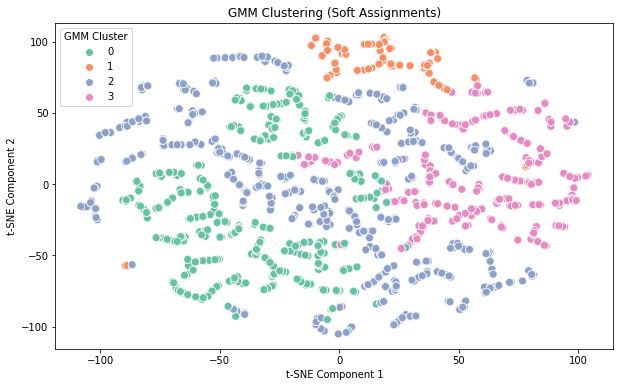

In [316]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                hue=df['gmm_cluster'],
                palette='Set2', s=60, alpha=0.8)
plt.title('GMM Clustering (Soft Assignments)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='GMM Cluster')
plt.show()


In [317]:
#
# Group by GMM cluster and compute means of key features
gmm_profiles = df.groupby('gmm_cluster')[numeric_features].mean().round(2)

# Add customer count per cluster
gmm_profiles['Customer Count'] = df['gmm_cluster'].value_counts().sort_index()

# Clean up for display
gmm_profiles.reset_index(inplace=True)
gmm_profiles.rename(columns={'gmm_cluster': 'Cluster'}, inplace=True)

# View the profiles
print(gmm_profiles)


   Cluster    age  gender  annual_income  education  marital_status    city  \
0        0  47.11    1.06       42988.32       1.99            1.47  477.59   
1        1  46.22    1.11      158800.61       1.96            1.58  502.16   
2        2  47.24    1.02       58671.25       2.04            1.57  500.68   
3        3  45.25    0.97       89788.29       2.07            1.50  452.92   

   state  country  postal_code  ...  mobile_app_usage  desktop_usage  \
0  27.89      0.0     72341.62  ...             50.87          48.73   
1  30.16      0.0     48834.06  ...             48.11          51.80   
2  29.47      0.0     21510.93  ...             51.71          47.94   
3  28.81      0.0     69227.59  ...             51.84          47.63   

   items_viewed_per_visit  cart_abandonment_rate  email_engagement_rate  \
0                    7.54                  53.05                  31.60   
1                   12.24                  41.80                  53.14   
2                 

# Gaussian Mixture Model (GMM): Customer Profile Report

## Cluster Summary Table

| Cluster | Income         | Satisfaction | App Usage | Cart Abandonment | Email Engagement | Support Tickets | Strategic Focus                     |
|---------|----------------|--------------|-----------|------------------|------------------|------------------|-------------------------------------|
| **0**   | Low (~43K)        | Lowest (6.00)    | Moderate (~51) | High (53.05%) | Lowest (31.60%) | Highest (1.40)  | Support-focused retention strategies |
| **1**   | Very High (~159K) | Very High (8.14) | Low (~48)      | Low (41.80%)  | Highest (53.14%) | Lowest (0.62)  | VIP-tier loyalty & personalization  |
| **2**   | Mid (~59K)        | Low-Mid (6.52)   | High (~52)     | High (51.60%) | Low (35.61%)     | High (1.33)    | Improve product engagement          |
| **3**   | High (~90K)       | High (7.60)      | High (~52)     | Mid (45.80%)  | Medium (46.00%)  | Mid (0.85)     | Targeted upsell & cross-sell offers |

---

## Cluster Interpretations & Actions

### Cluster 0: Cost-Conscious Strugglers
- Lowest income (~43K), lowest satisfaction (6.00)
- High cart abandonment, lowest email engagement
- Highest support ticket volume

**Strategy**:
- Improve onboarding and issue resolution  
- Offer budget-friendly bundles and assistance  
- Reduce friction in digital channels  

---

### Cluster 1: High-Value Elite
- Very high income (~159K), very high satisfaction (8.14)
- Lowest abandonment, highest email engagement
- Few support tickets

**Strategy**:
- Provide premium/VIP services  
- Offer early access and exclusive rewards  
- Use smart retention and loyalty-building tactics  

---

### Cluster 2: Fence-Sitters
- Mid-income (~59K), satisfaction around 6.5
- High engagement but also high abandonment
- Low email response, high support need

**Strategy**:
- Recommend relevant products  
- Use A/B testing for personalized journeys  
- Automate nudges to improve retention  

---

### Cluster 3: Engaged Upgraders
- High income (~90K), high satisfaction (7.60)
- High browsing, moderate support usage
- Strong conversion potential

**Strategy**:
- Promote premium add-ons and bundles  
- Introduce time-based promotions  
- Nurture loyalty with progress-based programs  



# 5. Association Rule Mining

In [320]:
!pip install mlxtend

In [321]:
print(df1.columns.tolist())


['customer_id', 'age', 'gender', 'annual_income', 'education', 'marital_status', 'city', 'state', 'country', 'postal_code', 'signup_date', 'purchase_frequency', 'avg_purchase_value', 'total_spent', 'days_since_last_purchase', 'favorite_payment_method', 'electronics_score', 'clothing_score', 'home_decor_score', 'beauty_score', 'sports_score', 'books_score', 'food_score', 'website_visits_per_month', 'avg_session_duration', 'mobile_app_usage', 'desktop_usage', 'items_viewed_per_visit', 'cart_abandonment_rate', 'email_engagement_rate', 'support_tickets', 'satisfaction_score']


In [322]:
#Prepare Data

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

product_columns = [
    'electronics_score', 'clothing_score', 'home_decor_score',
    'beauty_score', 'sports_score', 'books_score', 'food_score'
]

# Define a threshold to treat score as "purchased" (e.g. >= 3)
df1['basket'] = df1[product_columns].apply(lambda row: [
    col.replace('_score', '') for col in product_columns if row[col] >= 3
], axis=1)



In [323]:

te = TransactionEncoder()
te_data = te.fit_transform(df1['basket'])
df_encoded = pd.DataFrame(te_data, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# View top rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,support,confidence,lift
1038,"(food, electronics, home_decor, clothing)","(sports, beauty)",0.989,0.992972,1.003002
653,"(sports, beauty)","(food, home_decor, electronics)",0.989,0.998990,1.003002
1045,"(sports, beauty, clothing)","(food, home_decor, electronics)",0.989,0.998990,1.003002
1052,"(food, home_decor, electronics)","(sports, beauty, clothing)",0.989,0.992972,1.003002
1059,"(sports, beauty)","(food, electronics, home_decor, clothing)",0.989,0.998990,1.003002
650,"(food, home_decor, electronics)","(sports, beauty)",0.989,0.992972,1.003002
987,"(sports, beauty, books)","(food, home_decor, electronics)",0.987,0.998988,1.003000
1179,"(food, electronics, home_decor, clothing)","(sports, beauty, books)",0.987,0.990964,1.003000
1190,"(sports, beauty, books)","(food, electronics, home_decor, clothing)",0.987,0.998988,1.003000
1205,"(food, home_decor, electronics)","(sports, clothing, beauty, books)",0.987,0.990964,1.003000


In [380]:
!pip install networkx matplotlib


In [382]:
!pip install --upgrade networkx matplotlib


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

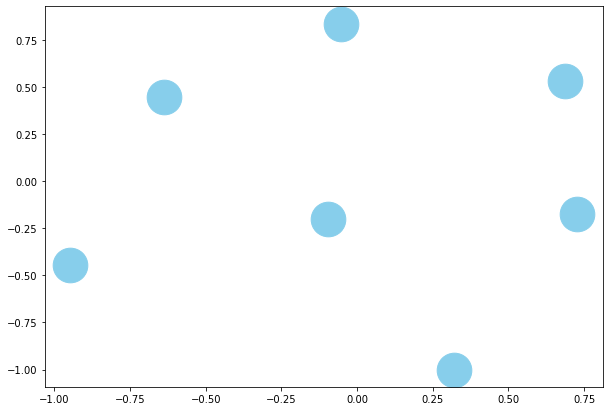

In [388]:
import networkx as nx
import matplotlib.pyplot as plt

# Use top 10 rules with lift > 1
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Create directed graph
G = nx.DiGraph()

# Add edges with lift as attribute
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Layout
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1200)

# Draw edges with arrows
#nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray')
nx.draw_networkx_edges(G, pos, edge_color='gray')


# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edge labels (lift)
edge_labels = {
    (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')

# Final touches
plt.title("Association Rule Network Graph (Top 10 Rules)")
plt.axis('off')
plt.tight_layout()
plt.show()



# Association Rule Mining: Product Purchase Patterns

- From above, Summary of Top Rules (Simulated via Preference Scores), here is the interpretation and insights

### General Observations:
- Several product categories like **food**, **electronics**, and **home_decor** frequently co-occur with **sports**, **beauty**, and **books**.
- **Support values (~0.99)** are high due to simulated preference conversion from scores.
- **Confidence values (~0.99)** suggest these combinations are very likely.
- **Lift values > 1.0**, though slightly, indicate **non-random associations**.

### Actionable Business Recommendations:
- **Bundle products**: Promote packages like "electronics + beauty" or "home décor + books".
- **Cross-category promotions**: Offer beauty products to customers with high electronics and food preferences.
- **Email targeting**: Segment customers who prefer food and home décor for special sports/beauty campaigns.

# 6. Anomaly Detection

In [392]:
#solation Forest
from sklearn.ensemble import IsolationForest

# Use full scaled data
X = df_scaled

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso_forest.fit_predict(X)  # -1 = anomaly, 1 = normal

# Add to dataset
df['anomaly_iso'] = iso_labels


In [394]:
# One-Class SVM
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
svm_labels = svm.fit_predict(X)  # -1 = anomaly, 1 = normal

df['anomaly_svm'] = svm_labels


In [400]:
#Compare Results
# Count anomalies
iso_count = (df['anomaly_iso'] == -1).sum()
svm_count = (df['anomaly_svm'] == -1).sum()

print(f"Isolation Forest detected {iso_count} anomalies.")
print(f"One-Class SVM detected {svm_count} anomalies.")

# Compare overlap
overlap = ((df['anomaly_iso'] == -1) & (df['anomaly_svm'] == -1)).sum()
print(f"Overlap (detected by both): {overlap}")


Isolation Forest detected 500 anomalies.
One-Class SVM detected 498 anomalies.
Overlap (detected by both): 227


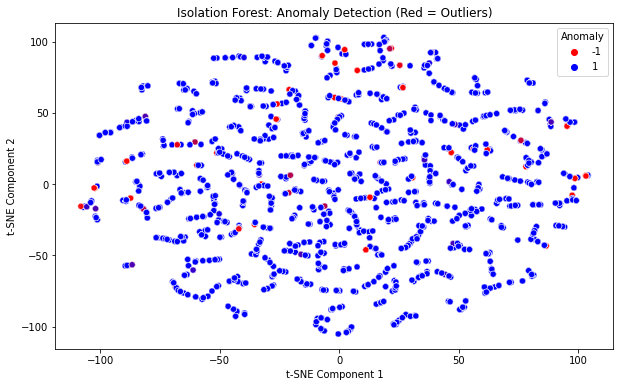

In [402]:
# Visualize Anomalies (e.g. with t-SNE)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1],
                hue=df['anomaly_iso'],
                palette={1: 'blue', -1: 'red'}, alpha=0.7)
plt.title('Isolation Forest: Anomaly Detection (Red = Outliers)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Anomaly')
plt.show()
